<a href="https://colab.research.google.com/github/pswoo0323/signal-system/blob/main/%EC%8B%A0%ED%98%B8_%EB%B0%8F_%EC%8B%9C%EC%8A%A4%ED%85%9CDFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# File path
file_path = "/content/drive/MyDrive/Colab Notebooks/sample1.snd"

Mounted at /content/drive


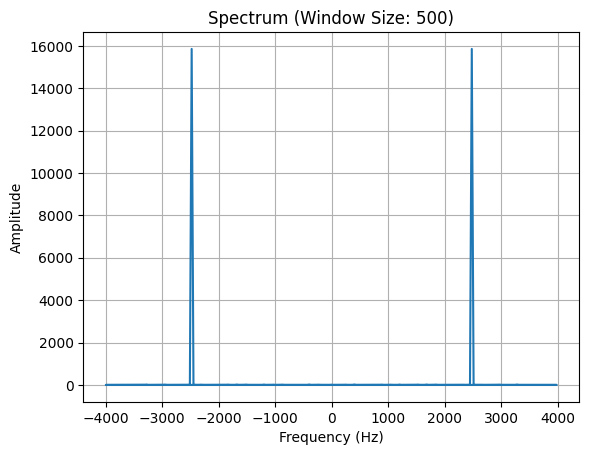

Window Size: 500, Max Frequency: 2480.00 Hz


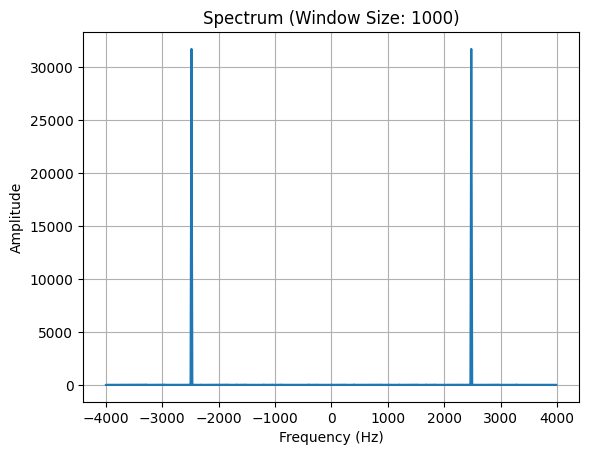

Window Size: 1000, Max Frequency: 2480.00 Hz


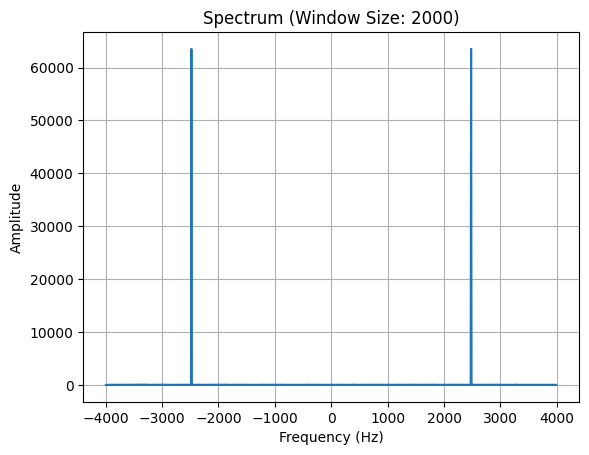

Window Size: 2000, Max Frequency: 2480.00 Hz


In [8]:
sample_rate = 8000

# Window sizes
window_sizes = [500, 1000, 2000]

# Read binary file
with open(file_path, "rb") as file:
    # Read the entire file
    data = file.read()

# Convert data to numpy array of int8 type
data = np.frombuffer(data, dtype=np.int8)

# Calculate the duration of the signal
duration = len(data) / sample_rate

# DFT calculation function
def calculate_dft(window_size):
    # Generate a window function
    window = np.hanning(window_size)

    # Calculate the spectrum by dividing the data into windows
    spectrum = np.fft.fft(data[:window_size] * window)

    # Generate the frequency axis
    freq_axis = np.fft.fftfreq(window_size, 1/sample_rate)

    return spectrum, freq_axis

# Calculate the spectrum and maximum frequency for each window size
for window_size in window_sizes:
    spectrum, freq_axis = calculate_dft(window_size)

    # Plot the spectrum
    plt.figure()
    plt.plot(freq_axis, np.abs(spectrum))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'Spectrum (Window Size: {window_size})')
    plt.grid(True)
    plt.show()

    # Find the maximum frequency
    max_freq = freq_axis[np.argmax(np.abs(spectrum))]
    print(f"Window Size: {window_size}, Max Frequency: {max_freq:.2f} Hz")